# [E7] 나랑 닮은 연예인은 누구?
- 내 얼굴은 어떤 연예인과 닮았는지 알려주는 모델을 설계했다.

## step 1. 사진 모으기
- 한국에서 알만한 해외, 국내 셀럽들 사진 282장과 나의 사진 4장을 넣은 사진 총 286장이 dataset 이다. 파일 형식은 jpg, jpeg 섞여있다.

[(692, 1934, 1491, 1135)]


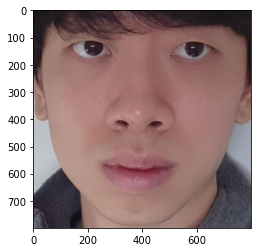

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/sangmin.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib
matplotlib.font_manager._rebuild()
import matplotlib.pyplot as plt


a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## step2. 얼굴 영역 자르기
- face_recognition을 import하여 이 모듈의 얼굴 찾기 기능을 이용한다. 이 얼굴찾기 기능은 이미지 속에서 얼굴 영역만을 정확하게 인식해서 추출해내는 작업이다. dlib 기반의 svm으로 얼굴을 찾는다고 한다. 연예인 이미지 path를 읽어들여 get_gropped_face로 얼굴영역만 잘라준다. 그런데 이 함수를 사용하고도 사진 상태가 이상해서 사각형으로 못자르는 경우가 있는데 이럴 경우 len(face_locations)이 0이 된다. 그래서 if문으로 return을 빈 리스트를 주게 했다.

In [2]:
def get_gropped_face(image_file):
    empty_list=[]
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0 :
        return empty_list
    else :
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]

        return cropped_face

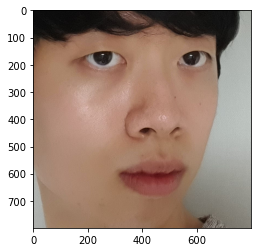

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/sangmin1.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [4]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)
print(file_list[:10])
#print ("file_list: {}".format(file_list))

['노무현.jpeg', '윤종신.jpeg', '이진호.jpeg', '시우민.jpg', '미미.jpg', '송중기.jpeg', '서강준.jpg', '하승진.jpg', '트와이스다현.jpeg', '다니엘 크레이그.jpeg']


## Step3. 얼굴 영역의 임베딩 추출하기.
- face_recognition 모듈에서 제공하는 face_recognition.face_encodings() 함수로 얼굴의 특징을 추출해서 적은 차원의 벡터로 만들기 위해서 딥러닝을 사용한다. 이 과정이 임베딩 추출 과정이다.

In [5]:
import numpy as np
image_file = os.path.join(dir_path, 'sangmin.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
ak = np.array(embedding)
ak.shape

(1, 128)

- 얼굴 임베딩 과정에서 이미지 path는 따로 list에 저장했다. 나중에 이 리스트를 이용해 결과물 이미지로 출력하기 위함이다. 얼굴을 인식 못해서 빈 리스트일 경우 len(face)는 0이다. 이 경우엔 if - continue를 이용하여 제외시켰다.

In [6]:
from PIL import Image

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    list1 =[]
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        list1.append(img_path)
        #face_array = np.array(face)
        #pillow_image = Image.fromarray(face_array)
        #pillow_image.save(path_to_save)
        
        if len(face) == 0: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]


    return embedding_dict, list1
#    return embedding_dict, pillow_image, list1

- 리스트에 path가 잘 들어가 있는것을 확인할 수 있었다.

In [7]:
embedding_dict, list1= get_face_embedding_dict(dir_path)
#embedding_dict, pillow_image, list1= get_face_embedding_dict(dir_path)
print(list1[:10])
#embedding_dict['sangmin']

['/home/aiffel-dj17/aiffel/face_embedding/celebrity/노무현.jpeg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/윤종신.jpeg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/이진호.jpeg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/시우민.jpg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/미미.jpg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/송중기.jpeg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/서강준.jpg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/하승진.jpg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/트와이스다현.jpeg', '/home/aiffel-dj17/aiffel/face_embedding/celebrity/다니엘 크레이그.jpeg']


- 이미지 임베딩 값의 차를 이용해 거리를 출력한다. 이 거리는 두 이미지 간의 가까운 정도이다. 

In [8]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('sangmin', 'sangmin1')

0.33890465898872824

- 순위를 메기기 위해 이미지들의 거리를 정렬한다.

In [9]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('sangmin')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [10]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('sangmin',
  array([-4.86760437e-02,  6.35574609e-02, -1.78771280e-02, -5.74083328e-02,
         -4.76081707e-02,  3.24833058e-02, -1.08454943e-01, -9.32474434e-02,
          1.11655556e-01, -1.20828718e-01,  1.98853552e-01, -4.53786887e-02,
         -2.19481483e-01, -1.27190009e-01,  9.35623422e-04,  1.43261895e-01,
         -2.02516422e-01, -1.23813123e-01,  3.83101068e-02, -5.90455066e-03,
          8.36628675e-02, -9.19533521e-03, -1.30082909e-02,  6.16943352e-02,
         -1.37180954e-01, -3.29226375e-01, -1.00978784e-01, -1.24369487e-01,
         -1.21977814e-02, -3.67673822e-02, -8.51440802e-02, -6.29162416e-02,
         -1.64141983e-01, -1.96908750e-02,  4.35889885e-02,  6.56721368e-02,
         -1.03214821e-02, -5.29573485e-02,  1.30987450e-01,  1.87844075e-02,
         -1.90115139e-01,  3.16997282e-02, -1.27623696e-02,  2.34193265e-01,
          1.46883175e-01,  6.30684048e-02,  1.11491401e-02, -1.22112721e-01,
          1.40281945e-01, -1.52545795e-01,  7.40432218e-02,  1.

## Step4. 모은 연예인들과 비교하기.
- 내 사진이 4장이 들어가서 비슷한 연예인 순위 사진을 5장 출력하려면 top=8로 바꿨다. 그리고 닮은 연예인 사진을 출력하기위해 facepath도 추가했했다. 내 사진 4장을 순위에서 제거하기 위해 if - continue 를 4번 사용했다.

In [16]:
import cv2

def get_nearest_face(name, top=8, facepath=list1):
    plt.rcParams["font.family"] = u'AppleGothic'
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    top_list = []
    insert_facepath = '/home/aiffel-dj17/aiffel/face_embedding/celebrity/'+name+'.jpg'
    print(name,'과 가장 닮은 셀럽은?')
    num=2
    for i in range(top+1):
        if i == 0  :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if i == 1 :
            continue
        if i == 2 :
            continue
        if i == 3:
            continue
            
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-3, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            top_list.append(sorted_faces[i][0])
    
    face = get_gropped_face(insert_facepath)
    fig = plt.figure(figsize=(15,15))
    #fig = plt.figure(figsize=(5,5))
    
    ax = fig.add_subplot(1, 6, 1)
    ax.imshow(face)
    ax.set_title(name)
    ax.axis("off")
    
    

    for j in top_list :
        for path in facepath :
            #print(j)
            if '/home/aiffel-dj17/aiffel/face_embedding/celebrity/'+j in path  :
                face = get_gropped_face(path)
                fig = plt.figure(figsize=(15-num+2,15-num+2))
                ax = fig.add_subplot(1, 6, num)
                #plt.rcParams["figure.figsize"] = (15-num, 15-num)
                
                ax.imshow(face)
                
                ax.set_title(num-1)
                
                ax.axis("off")
                num += 1
    plt.show()
                
                
                
                

## Step5. 다양한 재미있는 시각화 시도해보기   
- 닮은 연예인 사진이 순서대로 나오게 출력하고, 순위가 낮아질수록 figsize() 감소하게 해서 점점 사진이 작아지게 했다.

sangmin 과 가장 닮은 셀럽은?
순위 1 : 이름(박건우), 거리(0.4080182997679501)
순위 2 : 이름(진), 거리(0.4335111599696832)
순위 3 : 이름(안재홍), 거리(0.46595328323504664)
순위 4 : 이름(권현빈), 거리(0.4700831280840959)
순위 5 : 이름(서강준), 거리(0.47139137221617666)


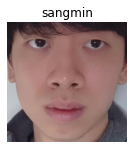

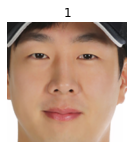

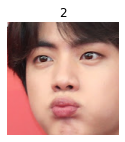

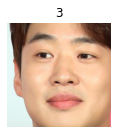

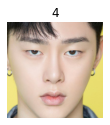

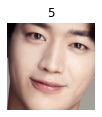

In [17]:
plt.rcParams["font.family"] = u'AppleGothic'
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('sangmin')

sangmin1 과 가장 닮은 셀럽은?
순위 1 : 이름(안재홍), 거리(0.34998395853464564)
순위 2 : 이름(박건우), 거리(0.3822076404893578)
순위 3 : 이름(정수빈), 거리(0.3970760961163624)
순위 4 : 이름(배성재), 거리(0.4047993992195752)
순위 5 : 이름(하현우), 거리(0.41798546698594163)


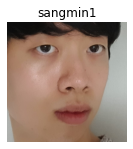

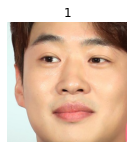

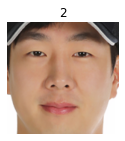

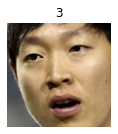

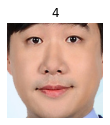

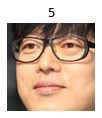

In [18]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('sangmin1')

sangmin3 과 가장 닮은 셀럽은?
순위 1 : 이름(박건우), 거리(0.42163992041706316)
순위 2 : 이름(권현빈), 거리(0.4343312653845105)
순위 3 : 이름(하현우), 거리(0.43630986047891734)
순위 4 : 이름(안재홍), 거리(0.44793744139241987)
순위 5 : 이름(정수빈), 거리(0.48025965575509355)


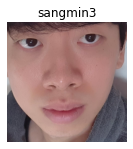

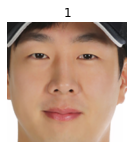

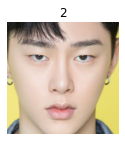

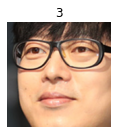

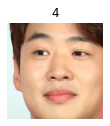

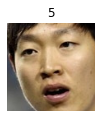

In [19]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('sangmin3')

sangmin2 과 가장 닮은 셀럽은?
순위 1 : 이름(진), 거리(0.3928036199790105)
순위 2 : 이름(안재홍), 거리(0.40786902988363066)
순위 3 : 이름(박건우), 거리(0.4217497721794797)
순위 4 : 이름(온앤오프와이엇), 거리(0.42228883049217053)
순위 5 : 이름(서강준), 거리(0.4231822740441188)


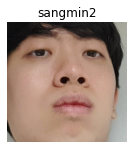

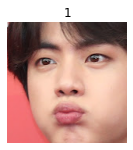

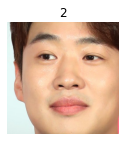

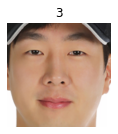

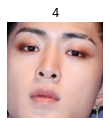

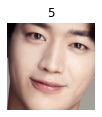

In [20]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('sangmin2')

# 마치며 ..
나온 연예인들에 점수를 매겨봤다. 1,2,3,4,5 등에 각각 5,4,3,2,1 점씩 줬다. 결과는    
1등 박건우 = 17점    
2등 안재홍 = 14점    
3등 진    = 9점   
4등 권현빈 = 6점   
5등 정수빈 = 4점   
5등 하현우 = 4점    
7등 서강준 = 2점    
7등 배성재 = 2점    
7등 온오프와이엇 = 2점